In [1]:
import numpy as np
import matplotlib.pyplot as plt
from linear_models import LinearBinaryClassifier, LinearOneVsAllClassifier
%matplotlib inline

In [56]:
folders = ['oracle', 'randomAscent', 'greedyAscent', 'gradientDescent']

In [68]:
loss_histories = []
max_acc_histories = []

for folder in folders:
    lh = np.load('binary_experiments/binary-'+folder+"-1-17/loss_history.npy")
    loss_histories.append(lh)
    ma = np.load('binary_experiments/binary-'+folder+"-1-17/max_acc_history.npy")
    max_acc_histories.append(ma)

In [15]:
data_path = "binary_data_2"
models = []
exp_type = "binary"
num_classifiers = 5
alpha = .5

X_exp = np.load(data_path + "/" + "X_exp.npy")
Y_exp = np.load(data_path + "/" + "Y_exp.npy")

for i in xrange(num_classifiers):
    weights = np.load(data_path + "/" + "weights_{}.npy".format(i))
    bias = np.load(data_path + "/" + "bias_{}.npy".format(i))
    if exp_type == "binary":
        model = LinearBinaryClassifier(weights, bias)
    else:
        model = LinearOneVsAllClassifier(10, weights, bias)
    models.append(model)

In [31]:
ensemble_weights = sum([1.0 / num_classifiers * model.weights for model in models ])
ensemble_bias = sum([1.0 / num_classifiers * model.bias for model in models ])

In [46]:
ensemble_model = LinearBinaryClassifier(ensemble_weights, ensemble_bias)

In [55]:
ensemble_model.evaluate(X_exp, Y_exp)

1.0

In [49]:
noise =  -1 * ensemble_model.gradient(X_exp, Y_exp)

for i in range(noise.shape[0]):
    noise[i] = noise[i] / np.linalg.norm(noise[i]) * alpha

In [53]:
ensemble_res = max([model.evaluate(X_exp + noise, Y_exp) for model in models])

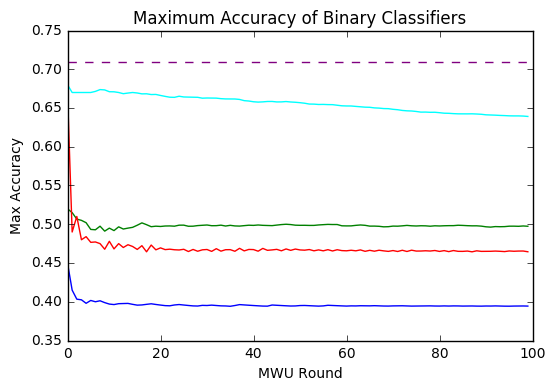

In [108]:
display_folders = ["oracle", 'random ascent', 'greedy ascent', 'reverse hinge loss']
colors = ["blue", "green", "red", "cyan"]
for i, ma in enumerate(max_acc_histories):
    plt.plot(range(100), ma, color=colors[i])
plt.plot(range(100), [ensemble_res] * 100, linestyle="--", color="purple")
# plt.legend(display_folders + ["ensemble baseline"], loc="right", bbox_to_anchor=(1,.55), fontsize=8)
plt.title("Maximum Accuracy of Binary Classifiers")
plt.ylabel("Max Accuracy")
plt.xlabel("MWU Round")

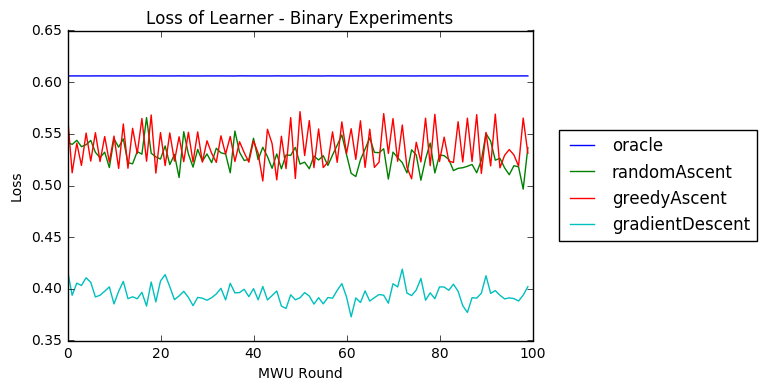

In [69]:
for lh in loss_histories:
    plt.plot(range(100), lh)
plt.legend(folders, loc="right", bbox_to_anchor=(1.5,.5))
plt.title("Loss of Learner - Binary Experiments")
plt.ylabel("Loss")
plt.xlabel("MWU Round")

In [74]:
max_acc_histories[0][-1]

0.39440000000000042

In [79]:
def findAlphaEquivalent(ensemble_model, X_exp, Y_exp, alpha, target):
    noise =  -1 * ensemble_model.gradient(X_exp, Y_exp)
    for i in range(noise.shape[0]):
        noise[i] = noise[i] / np.linalg.norm(noise[i]) * alpha

    res = max([model.evaluate(X_exp + noise, Y_exp) for model in models])
    
    if res > target:
        return findAlphaEquivalent(ensemble_model, X_exp, Y_exp, alpha + .01, target)
    else:
        return alpha
    

In [81]:
findAlphaEquivalent(ensemble_model, X_exp, Y_exp, .5, .3944)

0.7100000000000002

In [84]:
for i in range(noise.shape[0]):
        noise[i] = noise[i] / np.linalg.norm(noise[i]) * .70
print max([model.evaluate(X_exp + noise, Y_exp) for model in models])
    

0.41
